<a href="https://colab.research.google.com/github/John-p-v1999/basic_kmeans/blob/master/bisecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [100]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [101]:

import pandas as pd
data=pd.read_csv('/content/gdrive/My Drive/Iris.csv')

In [102]:

data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [103]:

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Species"] = lb_make.fit_transform(data["Species"])

In [104]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,1
1,19,5.7,3.8,1.7,0.3,0
2,119,7.7,2.6,6.9,2.3,2
3,79,6.0,2.9,4.5,1.5,1
4,77,6.8,2.8,4.8,1.4,1


In [105]:

def euclidean_dist(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [106]:

class KMeans:
  def __init__(self,K=2,max_iters=100,plot_steps=False):   
    self.K=K                                     # number of clusters(The 'K' value in K means)         
    self.max_iters=max_iters                     # maximum iterations that should be run for convergence of centroids
    self.plot_steps=plot_steps                   # optional, to plot intermediate outputs of centroids and clusters

    self.clusters = [[] for _ in range(self.K)]  # defining clusters as a list within a list of size K
    self.centroids=[]                            # the list where centroid values will be stored

  def predict(self,X,centroids):
    self.X=X                                     # storing the features of the dataset in a label. the size will be (150,4)
    self.n_samples, self.n_features= X.shape     #unsupervised to get number of samples and feature size
    #initialising the centroid

    self.centroids=centroids                     # the centroid value is initialised
    for _ in range(self.max_iters):              # running for max_iters
      self.clusters=self._create_clusters()      # function to create the clusters with current centroid values
      if self.plot_steps:                        # to plot the cluster
        self.plot()
      centroids_old=self.centroids               # the current centroids are stored in a new variable to check for convergence later
      self.centroids=self._get_centroids()       # Calculating the new centroids with the updated clusters
      if self.plot_steps:                        # plotting again
        self.plot()
      if self._is_converged(centroids_old):      # checking for convergence. If old centroid value is same as new centroid, the it is converged. Therefore break from loop
        break
    return self._get_cluster_labels(),self.centroids  # return the labels for each row and the centroid values



  def _create_clusters(self):
    clusters= [[] for _ in range(self.K)]
    for idx,sample in enumerate(self.X):
      closest_centroid=self._closest_centroid(sample) # finding the closest centroid to a point.
      clusters[closest_centroid].append(idx)          # the index of the point are stored in the corresponding cluster it belongs to.(Note: as labels are 0,1,2- they can also be the indices of array)
    return clusters
  def _closest_centroid(self,sample):
    dist=[euclidean_dist(sample,point) for point in self.centroids] # distances from each centroids are calculated
    return np.argmin(dist)                                          # np.argmin returns the index of the minimum value. in our case it returns the centroid closest to the point 
  def _get_centroids(self):                                         
    centroid=np.zeros((self.K, self.n_features))
    for idx,ele in enumerate(self.clusters):
      if len(ele)==0:
        cluster_mean=np.zeros(4)
      else:
        cluster_mean=np.mean(self.X[ele], axis=0)           #mean of each cluster is calculated. this will be the new centroid
      centroid[idx]=cluster_mean                          # the mean is assigned to corresponding to centroid
    return centroid

  def _is_converged(self,centroids_old):
    distance=[euclidean_dist(centroids_old[i],self.centroids[i]) for i in range(self.K)] # checking the convergence. If converged, the distance will be 0
    return sum(distance) == 0
  def _get_cluster_labels(self):
    labels=np.empty(self.n_samples)
    for idx,cluster in enumerate(self.clusters):
      for s_idx in cluster:
        labels[s_idx] = idx                       #labels is a list of size samples(150 in this case). for each sample, corresponding label,whether0,1 or 2 is calculated
    return labels
  def plot(self):
    fig = plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111,projection='3d')
    for i, index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point )
    for point in self.centroids:
      ax.scatter(*point, marker="x",c="black",linewidth=2)   # the centroids are marked as 'x'
    plt.show()

In [107]:
import math
def dist(X1,X2):
  return ((X1[0]-X2[0])**2)+((X1[1]-X2[1])**2)+((X1[2]-X2[2])**2)+((X1[3]-X2[3])**2)

In [108]:

x=data.iloc[:,1:-1].values   # this takes the columns 1 to second last( last column is not taken) and they are converted to numpy array
y=data.iloc[:,-1].values     # the last column is taken and converted to numpy array

In [109]:
g=np.arange(150)
op=np.random.choice(g,2)
op

array([142,  28])

In [110]:
clusters = len(np.unique(y))
k=KMeans(K=2, max_iters=150, plot_steps=False)
samples,features=x.shape
sicd=[]
g=np.arange(150)
centroid_list=[]
individ_sicd=[[0],[0]]
i_sicd=[]
for i in range(500):
  op=np.random.choice(g,2)
  centr=[x[op[0]],x[op[1]]]
  centroid_list.append(centr)
  y_pred,centroid=k.predict(x,centr)
  
  sicd_sum=0
  for j in range(samples):
    if y_pred[j]==0:
      sicd_sum+=dist(x[j],centroid[0])
      individ_sicd[0]+=dist(x[j],centroid[0])
    elif y_pred[j]==1:
      individ_sicd[1]+=dist(x[j],centroid[1])
      sicd_sum+=dist(x[j],centroid[1])
  sicd.append(sicd_sum)
  i_sicd.append(individ_sicd)
  individ_sicd=[[0],[0]]
  sicd_sum=0

In [111]:
print(sicd)
print(centroid_list)
print(i_sicd)


[152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915, 152.36870647733915,

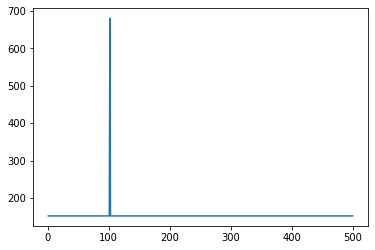

In [112]:
n=np.arange(1,501,1)
plt.plot(n,sicd)

In [113]:
v=np.argmin(sicd)
v

0

In [114]:
centroid_list[v]

[array([6.3, 2.5, 5. , 1.9]), array([5.5, 3.5, 1.3, 0.2])]

In [115]:
i_sicd[0]

[array([123.79587629]), array([28.57283019])]

it is clear from above values that the first cluster should be split again


In [116]:
final_centroid=[]
final_centroid.append(centroid_list[0][1])
final_sicd=i_sicd[v][1][0]

In [117]:
final_sicd

28.57283018867926

In [118]:


new_X=[]

new_Y=[]
X_old=[]
Y_old=[]
for i in range(len(y_pred)):
  if y_pred[i]==0:
    new_X.append(x[i])
    new_Y.append(y[i])
  else:
    X_old.append(x[i])
    Y_old.append(0)
x=np.array(new_X)
y=np.array(new_Y)
print(len(y))
print(len(x))


97
97


In [119]:
clusters = len(np.unique(y))
k=KMeans(K=2, max_iters=150, plot_steps=False)
samples,features=x.shape
sicd=[]
g=np.arange(len(y))
centroid_list=[]
individ_sicd=[[0],[0]]
i_sicd=[]
for i in range(500):
  op=np.random.choice(g,2)
  centr=[x[op[0]],x[op[1]]]
  centroid_list.append(centr)
  y_pred,centroid=k.predict(x,centr)
  
  sicd_sum=0
  for j in range(samples):
    if y_pred[j]==0:
      sicd_sum+=dist(x[j],centroid[0])
      individ_sicd[0]+=dist(x[j],centroid[0])
    elif y_pred[j]==1:
      individ_sicd[1]+=dist(x[j],centroid[1])
      sicd_sum+=dist(x[j],centroid[1])
  sicd.append(sicd_sum)
  i_sicd.append(individ_sicd)
  individ_sicd=[[0],[0]]
  sicd_sum=0

In [120]:
print(sicd)
print(centroid_list)
print(i_sicd)

[55.7041081081081, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 123.7958762886598, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.7041081081081, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 55.651677074041, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 123.7958762886598, 55.651677074041, 55.651677074041, 55.7041081081081, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 55.7041081081081, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677074041, 55.7041081081081, 55.7041081081081, 55.651677074041, 55.651677074041, 55.651677074041, 55.651677

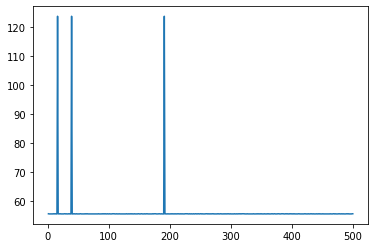

In [121]:
n=np.arange(1,501,1)
plt.plot(n,sicd)

In [122]:
v=np.argmin(sicd)
v

1

In [123]:
final_centroid.append(centroid_list[8][0])
final_centroid.append(centroid_list[8][1])
final_sicd+=i_sicd[v][0][0]
final_sicd+=i_sicd[v][1][0]

In [124]:
final_sicd

84.2245072627203

In [127]:
for i in range(len(y_pred)):
  if y_pred[i]==0:
    X_old.append(x[i])
    Y_old.append(1)
  else:
    X_old.append(x[i])
    Y_old.append(2)

In [136]:
len(Y_old)

150

In [129]:
len(X_old)

150

In [144]:
a=[]
b=[]
z=[]
for ele in X_old:
  a.append(ele[0])
  b.append(ele[1])
  z.append(ele[2])

In [132]:
clusters=[[] for _ in range(3)]
for i,ele in enumerate(y):
  clusters[ele].append(X_old[i][:3]) 

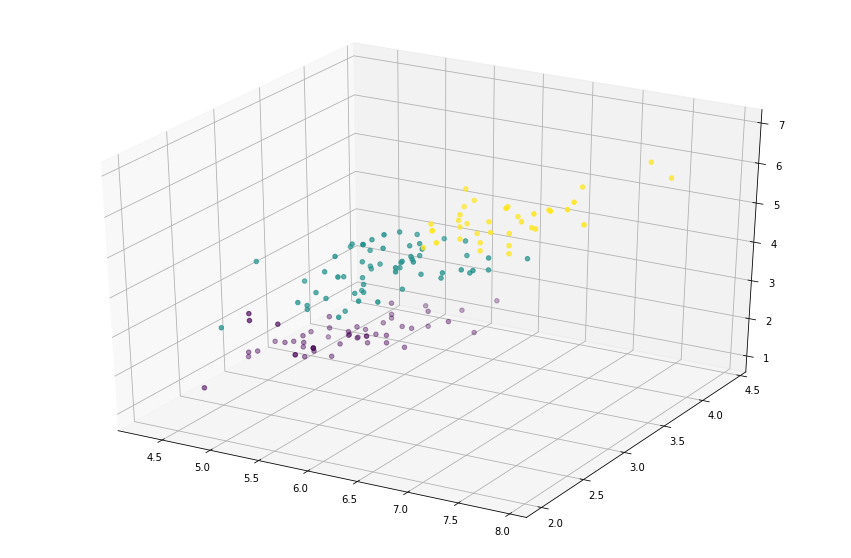

In [148]:
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(a,b,z,c=Y_old)